# **What is Credit Scoring?**

Credit scoring is one of the most widely used machine learning applications in finance. It helps institutions assess the creditworthiness of individuals using data-driven methods.


# **What I Learned**


 1. Data Preparation:

* Identified and handled missing values using median/mode imputation

* Performed exploratory data analysis (EDA) to uncover data insights

* Visualized patterns in credit behavior using plots and charts

2. Feature Engineering:

* Created meaningful features from raw data

* Converted categorical variables and handled skewed distributions

3. Model Building:

* Used pipelines to train and evaluate three classification algorithms: Logistic Regression, Decision Tree, Random Forest

4. Feature Scaling:

* Standardized features to improve model performance

5. Model Evaluation:

* Assessed models using accuracy, precision, recall, and F1-score

* Interpreted classification results in a business context



# **Tools and Libraries Used**

* Python 3.x

* Pandas for data manipulation

* Matplotlib & Seaborn for visualization

* Scikit-learn for preprocessing, modeling, and evaluation

# **Step-by-Step Workflow**

# **Step 1: Load the Dataset**

In [10]:
# Install required libraries
%pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
%pip install gdown


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import os

# Create the directory if it doesn't exist
output_dir = '../data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

import gdown
# File ID from Google Drive share link
file_id = '1rliGZ-tW5xV0SvFsZ6lyQccwWPnhe2wG'
url = f'https://drive.google.com/uc?id={file_id}'
output = os.path.join(output_dir, 'loan_data.csv')
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1rliGZ-tW5xV0SvFsZ6lyQccwWPnhe2wG
To: c:\Users\DELL\OneDrive\Desktop\Credit_Scoring _Project\data\loan_data.csv
100%|██████████| 52.4k/52.4k [00:00<00:00, 2.27MB/s]


'../data\\loan_data.csv'

In [13]:
import os
import gdown

output_dir = '../data'
output = os.path.join(output_dir, 'loan_data.csv')
file_id = '1rliGZ-tW5xV0SvFsZ6lyQccwWPnhe2wG'
url = f'https://drive.google.com/uc?id={file_id}'

if not os.path.exists(output):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    gdown.download(url, output, quiet=False)
else:
    print("File already exists:", output)

File already exists: ../data\loan_data.csv


In [14]:
import pandas as pd
# Load the dataset
df = pd.read_csv(output)

# Explore the first few rows
df.head()

,income,loan_amount,term,credit_history,defaulted
0,60940.854754,17402.715471,60,1.0,1
1,49511.242579,6664.626123,36,0.0,0
2,63658.393686,17985.281393,60,0.0,1
3,79414.537415,21001.173770,36,1.0,0
4,47785.239255,4037.586145,36,1.0,0


In [15]:
import os

# Create the directory if it doesn't exist
output_dir = '../data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

import gdown
# File ID from Google Drive share link
file_id = '1rliGZ-tW5xV0SvFsZ6lyQccwWPnhe2wG'
url = f'https://drive.google.com/uc?id={file_id}'
output = os.path.join(output_dir, 'loan_data.csv')
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1rliGZ-tW5xV0SvFsZ6lyQccwWPnhe2wG
To: c:\Users\DELL\OneDrive\Desktop\Credit_Scoring _Project\data\loan_data.csv
100%|██████████| 52.4k/52.4k [00:00<00:00, 587kB/s]


'../data\\loan_data.csv'

In [16]:
import os

# Create the directory if it doesn't exist
output_dir = '../data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [17]:
import pandas as pd
# Load the dataset
df = pd.read_csv('../data/loan_data.csv')

# Explore the first few rows
df.head()

,income,loan_amount,term,credit_history,defaulted
0,60940.854754,17402.715471,60,1.0,1
1,49511.242579,6664.626123,36,0.0,0
2,63658.393686,17985.281393,60,0.0,1
3,79414.537415,21001.173770,36,1.0,0
4,47785.239255,4037.586145,36,1.0,0


# **Step 2: Understand the data type and shape of the dataset**

In [18]:
df.shape

(1248, 5)

In [19]:
df.dtypes

income            float64
loan_amount       float64
term                int64
credit_history    float64
defaulted           int64
dtype: object

# **Step 3: Preprocessing data**

1.Check for missing values

In [20]:
df.isnull().sum()

income            120
loan_amount       122
term                0
credit_history    112
defaulted           0
dtype: int64

2.Mean or Median Imputation

In [21]:
df.fillna({'income':df['income'].median()}, inplace=True)
df.fillna({'loan_amount':df['loan_amount'].median()}, inplace=True)

In [22]:
df.fillna({'credit_history':df['credit_history'].mode()[0]}, inplace=True)

In [23]:
df.isnull().sum()

income            0
loan_amount       0
term              0
credit_history    0
defaulted         0
dtype: int64

3. Summary statistics

In [24]:
df.describe()

,income,loan_amount,term,credit_history,defaulted
count,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000
mean,52500.945298,16167.787505,48.000000,0.771635,0.414263
std,16967.161028,5541.521139,12.004811,0.419948,0.492792
min,8000.000000,1000.000000,36.000000,0.000000,0.000000
25%,41673.912889,12772.722413,36.000000,1.000000,0.000000
50%,52462.564119,16052.247335,48.000000,1.000000,0.000000
75%,62987.634437,19610.211517,60.000000,1.000000,1.000000
max,121349.166832,35158.645407,60.000000,1.000000,1.000000


# **Step 4: Data Visualization**

 1. Distribution of Numerical Features

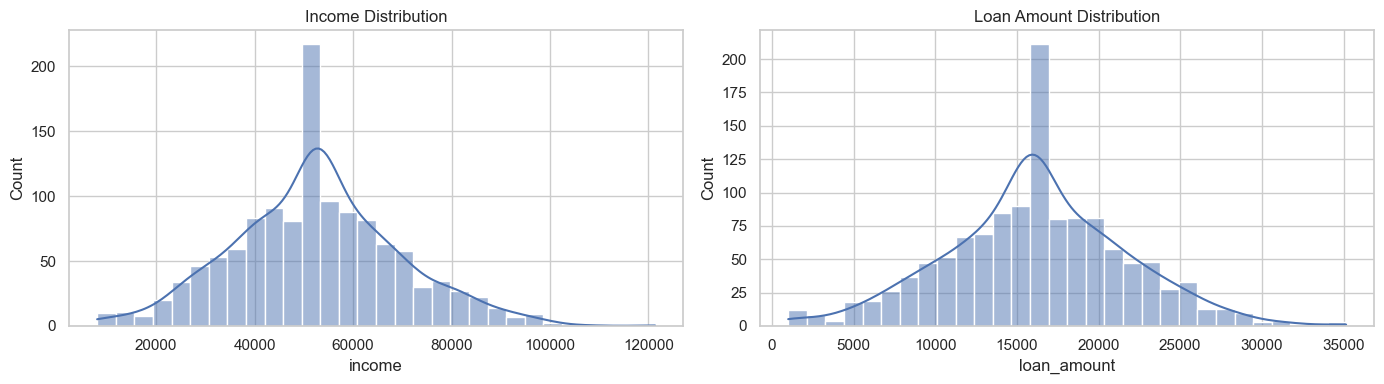

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set(style="whitegrid")

# Plot distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sns.histplot(df['income'], kde=True, bins=30, ax=axes[0])
axes[0].set_title("Income Distribution")

sns.histplot(df['loan_amount'], kde=True, bins=30, ax=axes[1])
axes[1].set_title("Loan Amount Distribution")

plt.tight_layout()
plt.show()

 2. Loan Term count plot

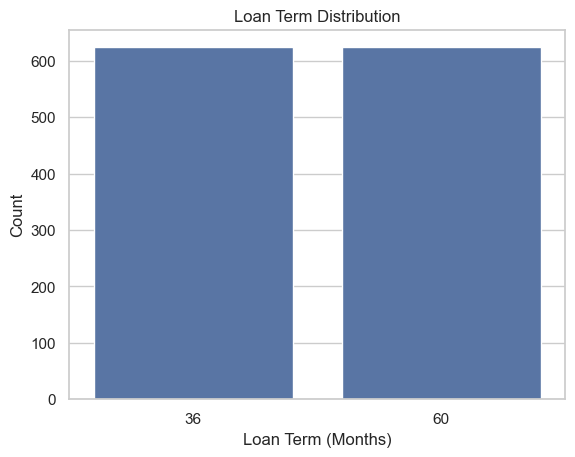

In [26]:
sns.countplot(x='term', data=df)
plt.title("Loan Term Distribution")
plt.xlabel("Loan Term (Months)")
plt.ylabel("Count")
plt.show()

3. Credit History vs Defaulted

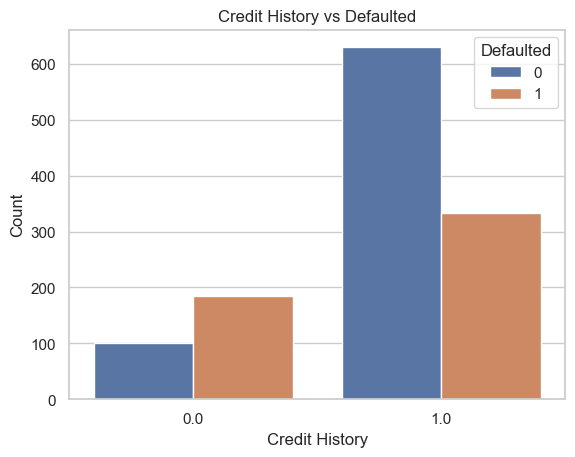

In [27]:
sns.countplot(x='credit_history', hue='defaulted', data=df)
plt.title("Credit History vs Defaulted")
plt.xlabel("Credit History")
plt.ylabel("Count")
plt.legend(title='Defaulted')
plt.show()

4. Correlation Heatmap

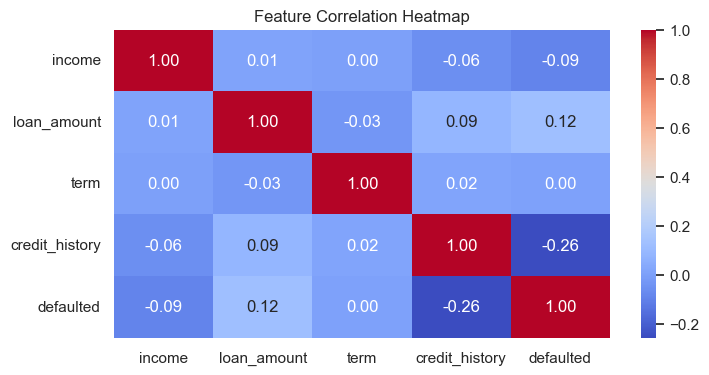

In [28]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# **Step 5: Feature Engineering**

1. Convert Categorical Features

In [29]:
# Binary encoding: 0 for 36 months, 1 for 60 months
df['term_binary'] = df['term'].apply(lambda x: 1 if x == 60 else 0)

2. Create Derived Features (Optional but insightful)

In [30]:
import numpy as np
# Log-transform skewed features
df['log_income'] = np.log1p(df['income'])
df['log_loan_amount'] = np.log1p(df['loan_amount'])

3. Feature Selection

In [31]:
# let's first see the features
list(df.columns)

['income',
 'loan_amount',
 'term',
 'credit_history',
 'defaulted',
 'term_binary',
 'log_income',
 'log_loan_amount']

In [32]:
features = ['log_income', 'log_loan_amount', 'term_binary', 'credit_history']
target = 'defaulted'

# **Step 6: Model Training**

1. Feature Scaling

In [34]:
%pip install scikit-learn

   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.7 MB 1.1 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/10.7 MB 981.5 kB/s eta 0:00:11
   --- ------------------------------------ 1.0/10.7 MB 1.0 MB/s eta 0:00:10
   ---- ----------------------------------- 1.3/10.7 MB 1.1 MB/s eta 0:00:09
   ------ --------------------------------- 1.8/10.7 MB 1.1 MB/s eta 0:00:09
   ------- -------------------------------- 2.1/10.7 MB 1.1 MB/s eta 0:00:08
   -------- ------------------------------- 2.4/10.7 MB 1.1 MB/s eta 0:00:08
   --------- ------------------------------ 2.6/10.7 MB 1.1 MB/s eta 0:00:08
   ---------- ----------------------------- 2.9/10.7 MB 1.1 MB/s eta 0:00:07
   ----------- ---------------------------- 3.1/10.7 MB 1.1 MB/s eta 0:00:07
   ------------- -


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()
# Define scaling features
scale_features = ['log_income', 'log_loan_amount']
# Fit the scaler to our dataset
df[scale_features] = scaler.fit_transform(df[scale_features])

df.head()

,income,loan_amount,term,credit_history,defaulted,term_binary,log_income,log_loan_amount
0,60940.854754,17402.715471,60,1.0,1,1,0.555865,0.335135
1,49511.242579,6664.626123,36,0.0,0,0,0.010029,-1.753786
2,63658.393686,17985.281393,60,0.0,1,1,0.670515,0.406800
3,79414.537415,21001.173770,36,1.0,0,0,1.251689,0.744209
4,47785.239255,4037.586145,36,1.0,0,0,-0.083218,-2.844410


2. Train Test Split

In [36]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df[features]
y = df[target]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

3. Build Model Pipeline :
To build and evaluate our credit scoring model, we will use three different classification algorithms:

Logistic Regression for its interpretability and baseline performance.

Decision Tree Classifier for its ability to capture non-linear relationships.

Random Forest Classifier for robustness and improved generalization.

In [37]:
# Import Required classess from sklearn
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [38]:
#  Define Classifier Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

In [39]:
# Step 9: Model Training and Evaluation (Updated)
best_model = None
best_accuracy = 0

for name, model in models.items():
    print(f"\nModel: {name}")
    pipeline = Pipeline([('classifier', model)])
    pipeline.fit(X_train, y_train)
    
    # Evaluate model
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    # Track best model
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = pipeline

# Save the best model
import os
import pickle

model_dir = "../model"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

with open(os.path.join(model_dir, "credit_model.pkl"), "wb") as f:
    pickle.dump(best_model, f)
print(f"\nSaved best model ({best_accuracy:.2%} accuracy) to model/credit_model.pkl")



Model: Logistic Regression

Model: Decision Tree

Model: Random Forest

Saved best model (66.80% accuracy) to model/credit_model.pkl
